In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# seed 값 설정

In [2]:
seed = 42

np.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 입력

In [3]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/02_DeepLearning/dataset/wine.csv', header=None).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
df_pre = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/02_DeepLearning/dataset/wine.csv', header=None)

In [5]:
df = df_pre.sample(frac=1)  # frac=1 100% 사용

In [6]:
df_pre.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
3103,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,0
1419,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,1
4761,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,0
4690,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,0
4032,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 3103 to 860
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [10]:
df.values

array([[ 7.  ,  0.17,  0.74, ..., 12.2 ,  8.  ,  0.  ],
       [ 7.7 ,  0.64,  0.21, ...,  9.9 ,  5.  ,  1.  ],
       [ 6.8 ,  0.39,  0.34, ..., 12.  ,  7.  ,  0.  ],
       ...,
       [ 6.4 ,  0.37,  0.2 , ...,  9.5 ,  5.  ,  0.  ],
       [ 6.5 ,  0.26,  0.5 , ...,  9.5 ,  5.  ,  0.  ],
       [ 7.2 ,  0.62,  0.06, ...,  9.5 ,  5.  ,  1.  ]])

In [11]:
dataset = df.values

x = dataset[:, :-1]
y = dataset[:, -1]

In [12]:
x, x.shape, y, y.shape

(array([[ 7.  ,  0.17,  0.74, ...,  0.38, 12.2 ,  8.  ],
        [ 7.7 ,  0.64,  0.21, ...,  0.45,  9.9 ,  5.  ],
        [ 6.8 ,  0.39,  0.34, ...,  0.44, 12.  ,  7.  ],
        ...,
        [ 6.4 ,  0.37,  0.2 , ...,  0.43,  9.5 ,  5.  ],
        [ 6.5 ,  0.26,  0.5 , ...,  0.47,  9.5 ,  5.  ],
        [ 7.2 ,  0.62,  0.06, ...,  0.54,  9.5 ,  5.  ]]),
 (6497, 12),
 array([0., 1., 0., ..., 0., 0., 1.]),
 (6497,))

# 모델 설정

In [13]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
# h1 만 나오는 코드 : input_dim=12, 활성화함수 relu
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 이진분류(sigmoid)

# 모델 컴파일 (환경설정)

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행 (학습)

In [15]:
# model.fit(x,y, epochs=200, batch_size=200)  # 200번 반복, 200개 묶음으로 반복해서 연습

# 결과출력

In [16]:
# print('\n Accuracy : %.4f'%(model.evaluate(x,y)[1]))

# 모델 저장 폴더 설정

In [17]:
pwd

'/content'

In [18]:
model_dir = './model/'
if not os.path.exists(model_dir):
  os.mkdir(model_dir)

# 모델 저장 조건 설정

In [19]:
model_path = './model/{epoch:02d}-{val_loss:.4f}.hdf5'   # 모델 저장 경로 설정
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verboss=1, save_best_only=True)

# 모델 실행 및 저장

In [20]:
#model.fit(x, y, validation_split=0.2, epochs=200, batch_size=200, verbose=1, callbacks=[checkpointer])

# ---

In [21]:
# 조기종료 설정
ealry_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [22]:
history = model.fit(x, y, validation_split=0.2, epochs=200, batch_size=200, verbose=1, callbacks=[[ealry_stopping_callback, checkpointer]])

Epoch 1/200
26/26 [==============================] - 11s 47ms/step - loss: 5.9351 - accuracy: 0.2453 - val_loss: 0.8867 - val_accuracy: 0.3977
Epoch 2/200
26/26 [==============================] - 1s 22ms/step - loss: 0.5549 - accuracy: 0.7520 - val_loss: 0.3521 - val_accuracy: 0.8446
Epoch 3/200
26/26 [==============================] - 1s 28ms/step - loss: 0.3206 - accuracy: 0.8395 - val_loss: 0.2571 - val_accuracy: 0.8823
Epoch 4/200
26/26 [==============================] - 1s 25ms/step - loss: 0.2530 - accuracy: 0.8953 - val_loss: 0.2208 - val_accuracy: 0.9200
Epoch 5/200
26/26 [==============================] - 0s 18ms/step - loss: 0.2260 - accuracy: 0.9192 - val_loss: 0.2105 - val_accuracy: 0.9323
Epoch 6/200
26/26 [==============================] - 0s 16ms/step - loss: 0.2189 - accuracy: 0.9232 - val_loss: 0.2078 - val_accuracy: 0.9331
Epoch 7/200
26/26 [==============================] - 0s 12ms/step - loss: 0.2143 - accuracy: 0.9250 - val_loss: 0.2017 - val_accuracy: 0.9354
Epoch

In [23]:
# y_vloss 변수 생성해서 validation set으로 측정한 실험결과 오차값 저장
y_vloss = history.history['val_loss']

# y_acc 변수 생성해서 validation set으로 측정한 실험결과 정확도 값 저장
y_acc = history.history['val_accuracy']

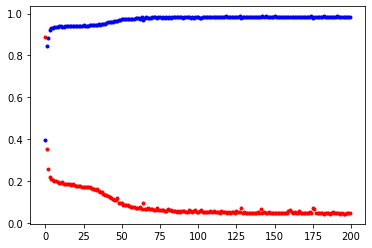

In [24]:
# x 값 지정 정확도는 파란색, 오차는 빨간색 표시

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='r', markersize=3)
plt.plot(x_len, y_acc, 'o', c='b', markersize=3)
plt.show()